<a href="https://colab.research.google.com/github/RaghavPeri/ai-mvp-portfolio/blob/main/stock-sentiment-dashboard/Stock_Sentiment_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📈 Stock Sentiment Dashboard – Google Sheets + VADER

This notebook analyzes stock news headlines stored in Google Sheets and visualizes sentiment trends over time using the VADER model.

- Headlines are stored in the `Headlines` tab of your Google Sheet.
- Sentiment scores are generated using VADER and plotted by company.
- To analyze new headlines, simply add rows to the sheet and re-run the final dashboard cell — no code changes needed.


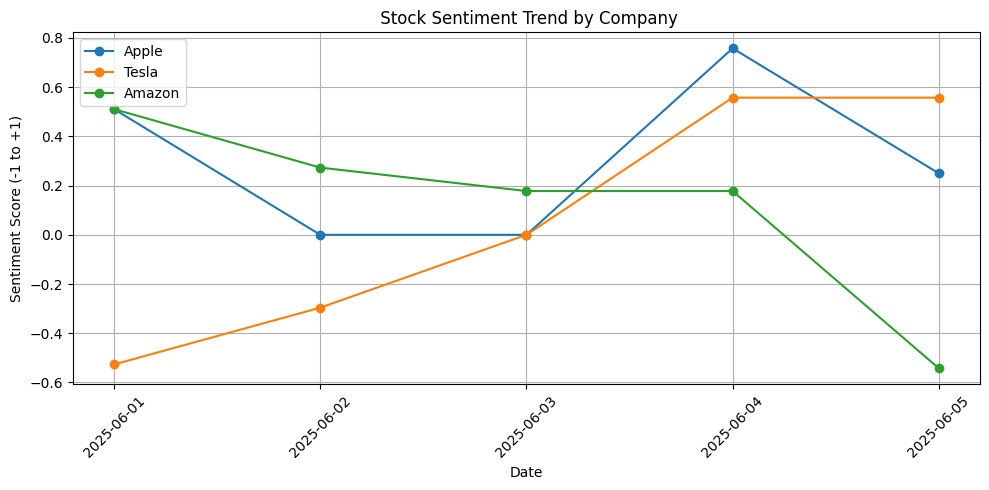

In [5]:
## 📈 Stock Sentiment Dashboard – Google Sheets + VADER in Google Colab

## This notebook reads stock news headlines from a Google Sheet, performs sentiment analysis using VADER, and displays sentiment trends in a line chart.

# Step 1: Install necessary packages
!pip install --upgrade gspread pandas vaderSentiment matplotlib --quiet

# Step 2: Import libraries and authenticate
import pandas as pd
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# Step 3: Connect to Google Sheet
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1KslSoDZp9MofJTE7e3YvdifvnAVNQpNEMSyoNCXrOTI/edit"
sheet = gc.open_by_url(spreadsheet_url)
worksheet = sheet.worksheet("Headlines")
data = worksheet.get_all_records()

# Step 4: Load into DataFrame
df = pd.DataFrame(data)

# Step 5: Run VADER sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

df['Sentiment Score'] = df['Headline'].apply(get_sentiment)

# Step 6: Plot sentiment trends per company
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.plot(company_df['Date'], company_df['Sentiment Score'], marker='o', label=company)

plt.title(" Stock Sentiment Trend by Company")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (-1 to +1)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 🔄 New Headlines → Updated Dashboard

Anytime a new headline is added to the Google Sheet, rerun this block to:

- Re-fetch the latest data from Google Sheets
- Recalculate VADER sentiment scores
- Re-render the updated sentiment trend chart

This enables dynamic updates without retraining or restarting the notebook.


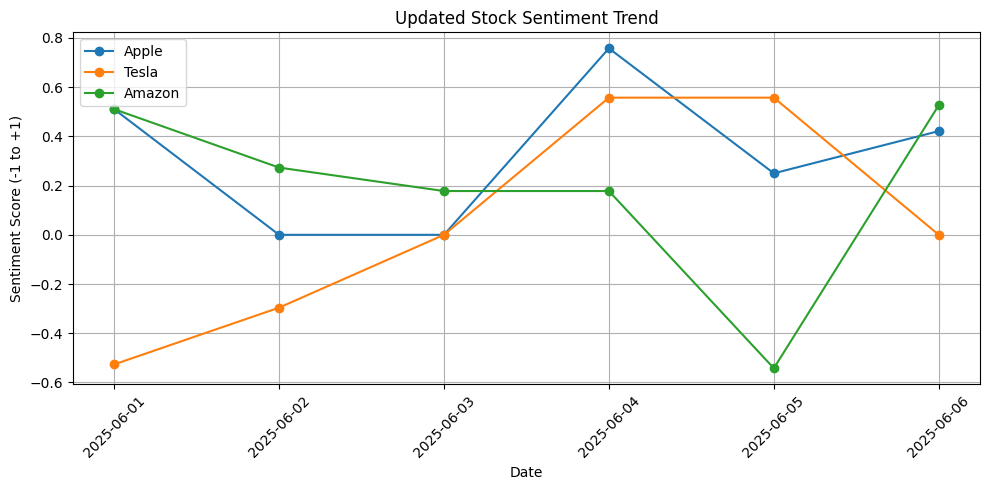

In [6]:
# Step 1: Fetch the latest data from Google Sheets
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Step 2: Recalculate sentiment scores
df['Sentiment Score'] = df['Headline'].apply(get_sentiment)

# Step 3: Re-plot the updated chart
plt.figure(figsize=(10, 5))
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.plot(company_df['Date'], company_df['Sentiment Score'], marker='o', label=company)

plt.title("Updated Stock Sentiment Trend")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (-1 to +1)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ✅ MVP Summary: Stock Sentiment Dashboard with Google Sheets Integration

This MVP analyzes and visualizes public sentiment on stock-related news headlines using VADER sentiment analysis. Data is pulled live from a Google Sheet.

### 🔍 What It Does:
- Ingests headline data from a “Headlines” tab in Google Sheets
- Applies VADER sentiment scoring to assess tone (positive/negative)
- Plots time-based sentiment trends per company
- Supports on-demand updates through sheet edits

### 🧰 Tech Stack:
- Google Colab + Google Sheets API (`gspread`)
- VADER Sentiment Analyzer
- `pandas` for data wrangling
- `matplotlib` for trend visualization

### 🎯 Product Thinking:
- Mimics executive dashboards and KPI trend views
- Great for tracking perception changes over time
- Modular pipeline enables scaling to multiple brands or data sources
